## Depression status classifier

## Goal of model ---> To detect someone's depression status 
The dataset aims to provide insights into how lifestyle and work conditions influence mental well-being, making it suitable for exploratory data analysis, predictive modeling,
<br>
 and statistical research. Potential applications include identifying risk factors for mental health issues, understanding the impact of work-life balance, and predicting mental 
 <br>
 health outcomes based on lifestyle patterns.

About data 
<br>
Add Suggestion
<br>
Dataset Statistics:
<br>
Total Entries: 2,054
<br>
Data Types:
<br>
Numerical: 5 columns (Age, Work Pressure, Job Satisfaction, Work Hours, Financial Stress).
<br>
Categorical: 6 columns (Gender, Sleep Duration, Dietary Habits, Suicidal Thoughts, Family History, Depression).


<h1>Health and Work Data Information</h1>
<li><strong>Gender</strong>: Male / Female</li>
<li><strong>Age</strong>: In years</li>
<li><strong>Work Pressure</strong>: 1 (low) to 5 (high)</li>
<li><strong>Job Satisfaction</strong>: 1 (low) to 5 (high)</li>
<li><strong>Sleep Duration</strong>: Less than 5 hours, 5-6 hours, 7-8 hours, More than 8 hours</li>
<li><strong>Dietary Habits</strong>: Healthy, Moderate, Unhealthy</li>
<li><strong>Have you ever had suicidal thoughts?</strong>: Yes / No</li>
<li><strong>Work Hours</strong>: Work hours per day</li>
<li><strong>Financial Stress</strong>: 1 (low) to 5 (high)</li>
<li><strong>Family History of Mental Illness</strong>: Yes / No</li>


# Importing necessary libraries

In [54]:
# Import necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
from matplotlib import pyplot as plt 
%matplotlib inline

# make with this report 
import pandas_profiling

# gnore all warnings
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")




# preprocessing imports 
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


# Alogrithim 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, HistGradientBoostingClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis


# Hyperpearmeter turning 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier


## model accuary metrices 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


## Tracking the Model 
import mlflow
import mlflow.sklearn


# Load the data 


In [2]:
# Load the data into a DataFrame
Depression_status = pd.read_csv('D:\\Professional\\data\\Depression Professional Dataset.csv')


In [3]:
Depression_status.head()

,Gender,Age,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work Hours,Financial Stress,Family History of Mental Illness,Depression
0,Female,37,2.0,4.0,7-8 hours,Moderate,No,6,2,No,No
1,Male,60,4.0,3.0,5-6 hours,Unhealthy,Yes,0,4,Yes,No
2,Female,42,2.0,3.0,5-6 hours,Moderate,No,0,2,No,No
3,Female,44,3.0,5.0,7-8 hours,Healthy,Yes,1,2,Yes,No
4,Male,48,4.0,3.0,7-8 hours,Moderate,Yes,6,5,Yes,No


In [4]:
Depression_status['Dietary Habits']

0        Moderate
1       Unhealthy
2        Moderate
3         Healthy
4        Moderate
          ...    
2049      Healthy
2050      Healthy
2051     Moderate
2052     Moderate
2053      Healthy
Name: Dietary Habits, Length: 2054, dtype: object

In [5]:
from pandas_profiling import ProfileReport  # Ensure you have this library installed

# Assuming your DataFrame is named 'df'
profile = ProfileReport(Depression_status, title="Pandas Profiling Report", explorative=True)

# Generate the report
profile.to_file("report.html")


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
# Display column names
print("\nColumn Names:")
print(Depression_status.columns.tolist())


Column Names:
['Gender', 'Age', 'Work Pressure', 'Job Satisfaction', 'Sleep Duration', 'Dietary Habits', 'Have you ever had suicidal thoughts ?', 'Work Hours', 'Financial Stress', 'Family History of Mental Illness', 'Depression']


In [7]:
## cheking the shape
Depression_status.shape

(2054, 11)

In [8]:
## checking info of the data
Depression_status.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2054 entries, 0 to 2053
Data columns (total 11 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 2054 non-null   object 
 1   Age                                    2054 non-null   int64  
 2   Work Pressure                          2054 non-null   float64
 3   Job Satisfaction                       2054 non-null   float64
 4   Sleep Duration                         2054 non-null   object 
 5   Dietary Habits                         2054 non-null   object 
 6   Have you ever had suicidal thoughts ?  2054 non-null   object 
 7   Work Hours                             2054 non-null   int64  
 8   Financial Stress                       2054 non-null   int64  
 9   Family History of Mental Illness       2054 non-null   object 
 10  Depression                             2054 non-null   object 
dtypes: f

In [9]:
## checking the values of the data
null_values = Depression_status.isnull().sum()

print(f"null values: \n {null_values}")

null values: 
 Gender                                   0
Age                                      0
Work Pressure                            0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Have you ever had suicidal thoughts ?    0
Work Hours                               0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64


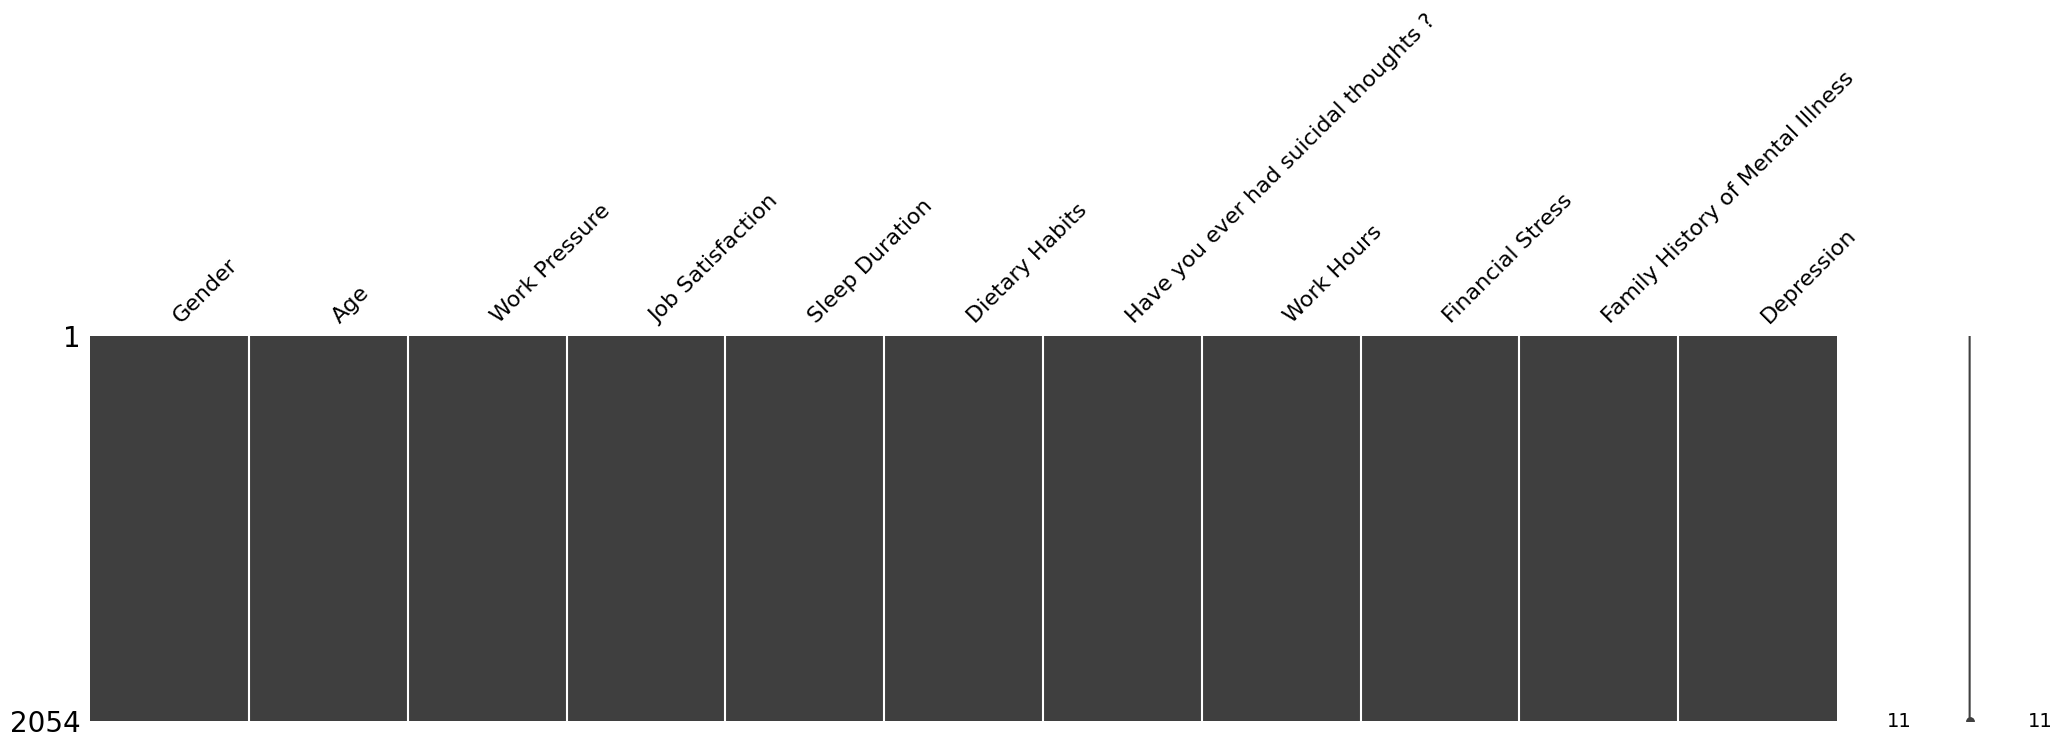

In [10]:
# How many missing values are there in our dataset?
msno.matrix(Depression_status, figsize = (25,5))
plt.show()


In [11]:
# Check for duplicate rows
duplicates = Depression_status.duplicated().sum()
print(f"The dupicates values : {duplicates}")

The dupicates values : 0


In [12]:
# Summary statistics for numeric columns
print("\nSummary Statistics for Numeric Columns:")
Depression_status.describe()



Summary Statistics for Numeric Columns:


,Age,Work Pressure,Job Satisfaction,Work Hours,Financial Stress
count,2054.000000,2054.000000,2054.000000,2054.000000,2054.000000
mean,42.171860,3.021908,3.015093,5.930867,2.978578
std,11.461202,1.417312,1.418432,3.773945,1.413362
min,18.000000,1.000000,1.000000,0.000000,1.000000
25%,35.000000,2.000000,2.000000,3.000000,2.000000
50%,43.000000,3.000000,3.000000,6.000000,3.000000
75%,51.750000,4.000000,4.000000,9.000000,4.000000
max,60.000000,5.000000,5.000000,12.000000,5.000000


In [13]:
# Correlation of 'Depression_status' with other numeric columns
correlation = Depression_status.describe().corr()
correlation



,Age,Work Pressure,Job Satisfaction,Work Hours,Financial Stress
Age,1.000000,0.999781,0.999781,0.999830,0.999781
Work Pressure,0.999781,1.000000,1.000000,0.999994,1.000000
Job Satisfaction,0.999781,1.000000,1.000000,0.999994,1.000000
Work Hours,0.999830,0.999994,0.999994,1.000000,0.999994
Financial Stress,0.999781,1.000000,1.000000,0.999994,1.000000


In [14]:
Depression_status.head()

,Gender,Age,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work Hours,Financial Stress,Family History of Mental Illness,Depression
0,Female,37,2.0,4.0,7-8 hours,Moderate,No,6,2,No,No
1,Male,60,4.0,3.0,5-6 hours,Unhealthy,Yes,0,4,Yes,No
2,Female,42,2.0,3.0,5-6 hours,Moderate,No,0,2,No,No
3,Female,44,3.0,5.0,7-8 hours,Healthy,Yes,1,2,Yes,No
4,Male,48,4.0,3.0,7-8 hours,Moderate,Yes,6,5,Yes,No


In [15]:
# Data preprocessing 
Depression_status['Sleep Duration'].value_counts()

Sleep Duration
7-8 hours            530
Less than 5 hours    525
5-6 hours            505
More than 8 hours    494
Name: count, dtype: int64

In [16]:
# Define an order for the categories
sleep_order = {
    "Less than 5 hours": 1,
    "5-6 hours": 2,
    "7-8 hours": 3,
    "More than 8 hours": 4
}

# Apply the mapping to the column
Depression_status['Sleep Duration'] = Depression_status['Sleep Duration'].map(sleep_order)


# Apply the EDA 

In [17]:
Depression_status.head(5)

,Gender,Age,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work Hours,Financial Stress,Family History of Mental Illness,Depression
0,Female,37,2.0,4.0,3,Moderate,No,6,2,No,No
1,Male,60,4.0,3.0,2,Unhealthy,Yes,0,4,Yes,No
2,Female,42,2.0,3.0,2,Moderate,No,0,2,No,No
3,Female,44,3.0,5.0,3,Healthy,Yes,1,2,Yes,No
4,Male,48,4.0,3.0,3,Moderate,Yes,6,5,Yes,No


## Identify  Categorical Columns:

In [18]:
categorical_columns = Depression_status.select_dtypes(include=['object', 'category']).columns

print("Categorical Columns:")
print(categorical_columns)


Categorical Columns:
Index(['Gender', 'Dietary Habits', 'Have you ever had suicidal thoughts ?',
       'Family History of Mental Illness', 'Depression'],
      dtype='object')


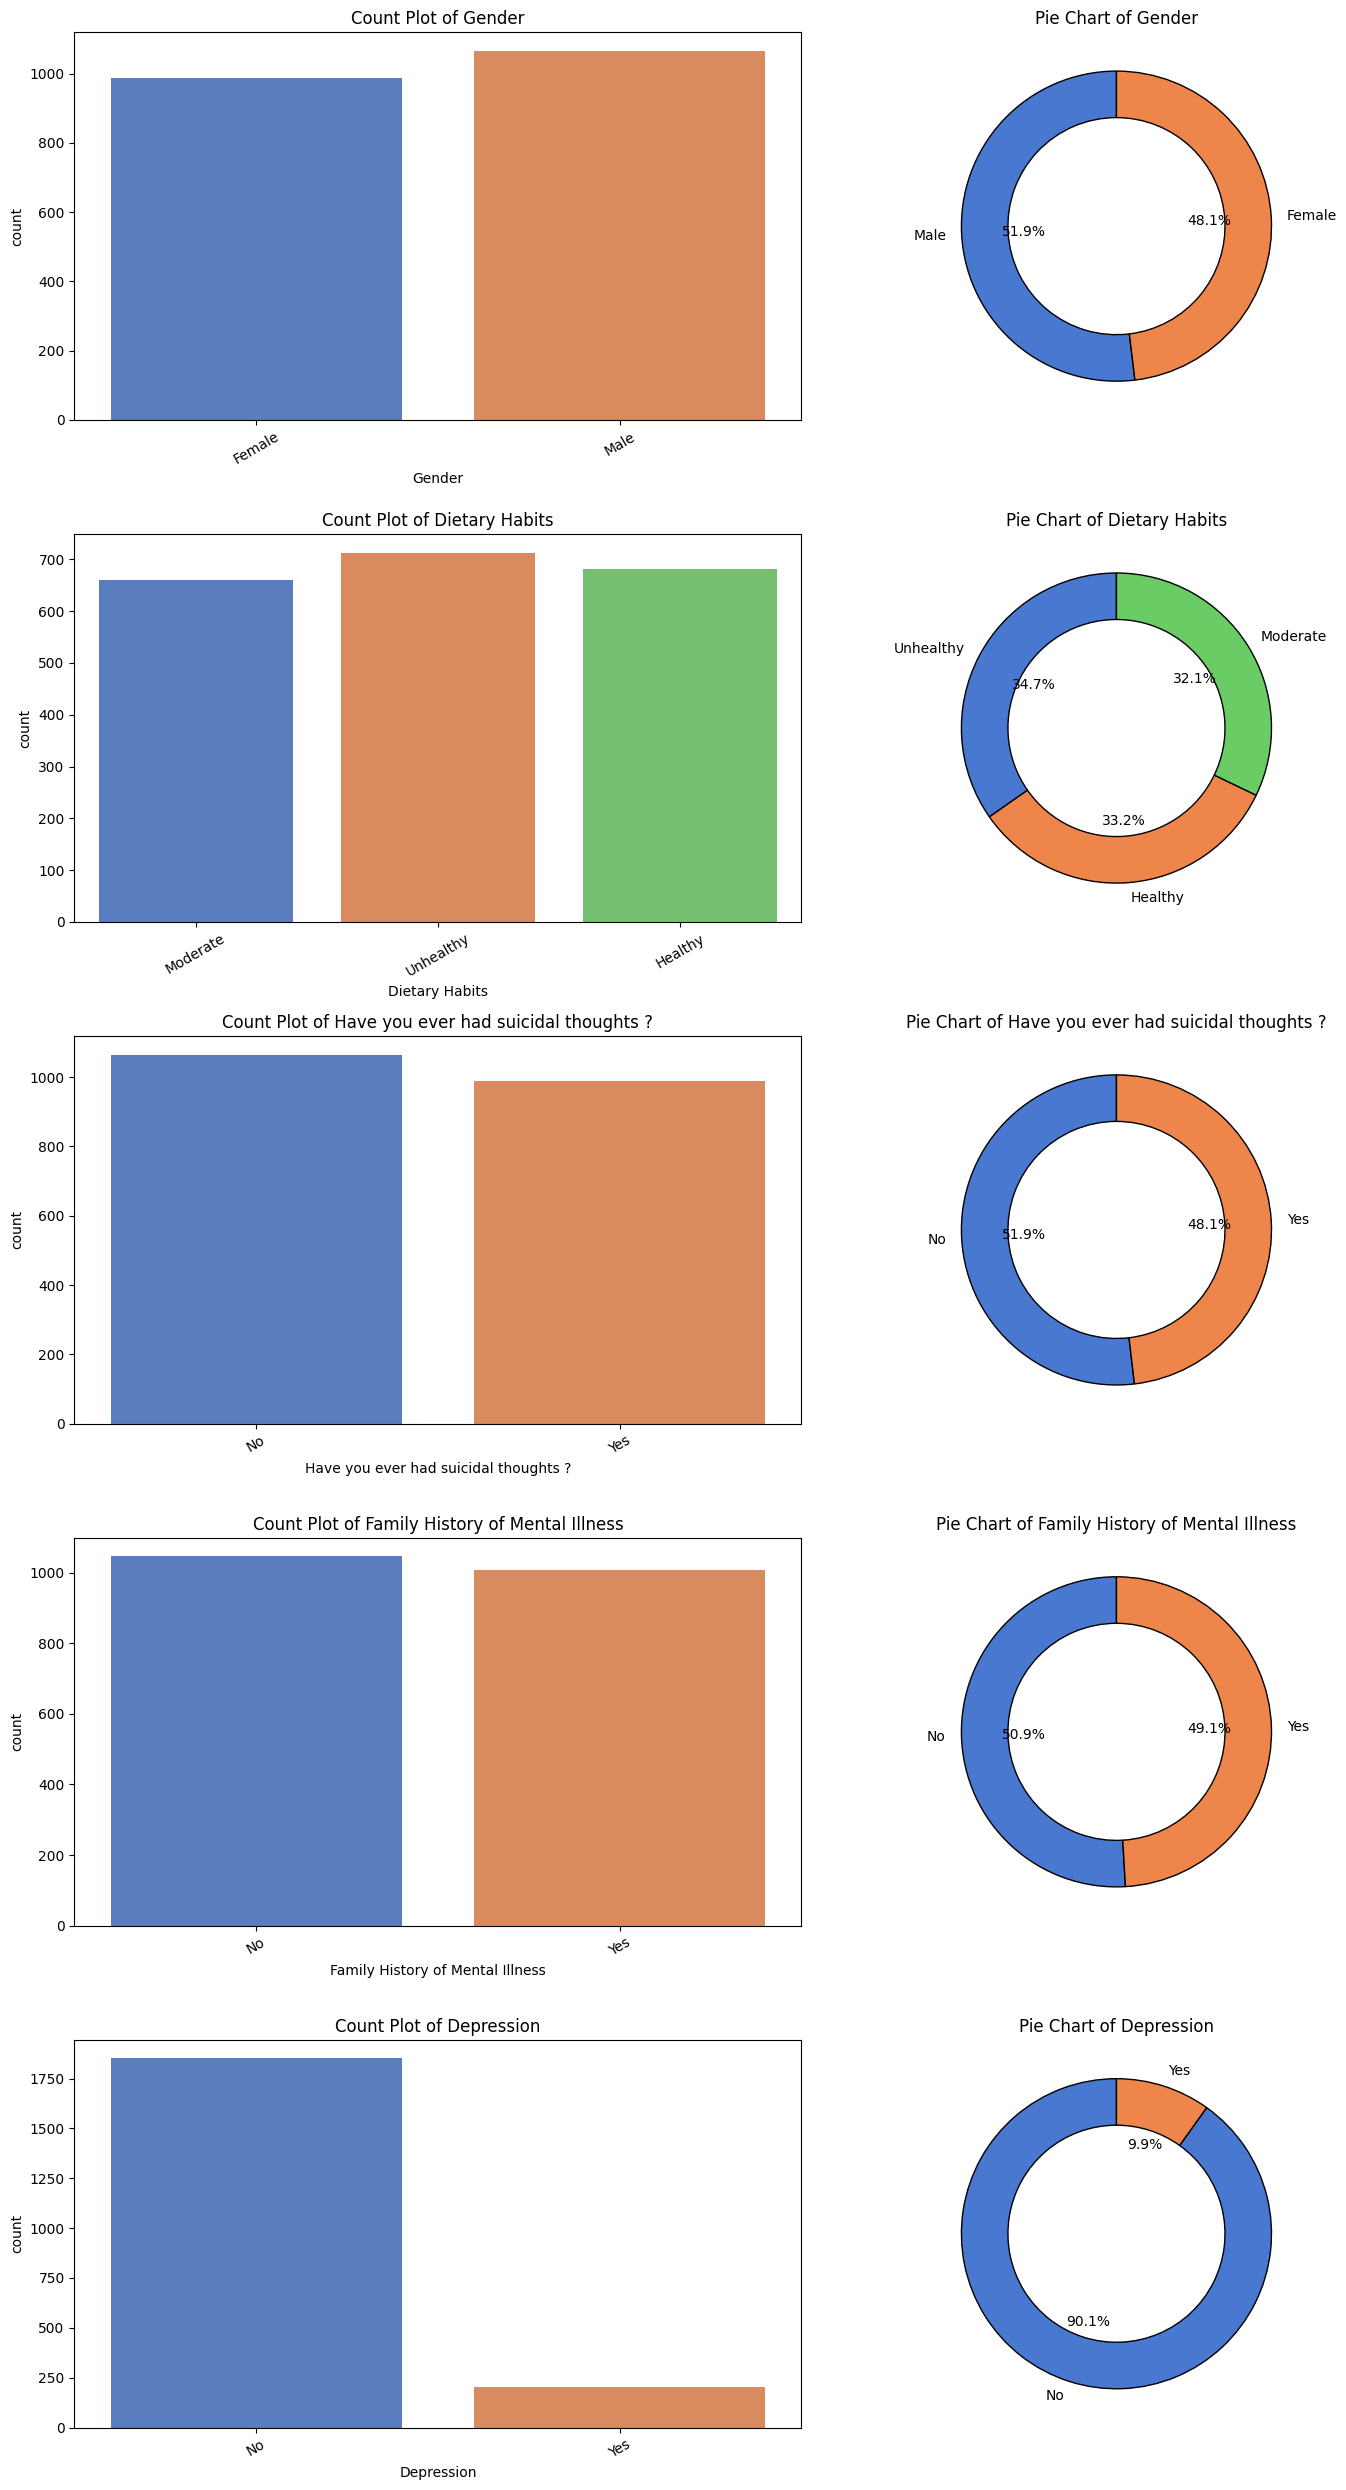

In [19]:
import matplotlib.pyplot as plt

# List of categorical columns
categorical_columns = ['Gender', 'Dietary Habits', 'Have you ever had suicidal thoughts ?', 
                       'Family History of Mental Illness', 'Depression']


# Plot count plots and pie charts
fig, axes = plt.subplots(len(categorical_columns), 2, figsize=(15, 5 * len(categorical_columns)))

for i, column in enumerate(categorical_columns):
    # Count plot
    sns.countplot(data=Depression_status, x=column, ax=axes[i, 0], palette='muted')
    axes[i, 0].set_title(f"Count Plot of {column}")
    axes[i, 0].tick_params(axis='x', rotation=30)

    # Pie chart
    Depression_status[column].value_counts().plot.pie(
        ax=axes[i, 1],
        autopct='%1.1f%%', 
        startangle=90, 
        colors=sns.color_palette('muted'),
        labels=Depression_status[column].value_counts().index, wedgeprops={'edgecolor': 'black', 'width': 0.3}
    )
    axes[i, 1].set_ylabel('')  # Remove y-axis label for the pie chart
    axes[i, 1].set_title(f"Pie Chart of {column}")

plt.tight_layout()
plt.show()

In [20]:
Depression_status.head()

,Gender,Age,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work Hours,Financial Stress,Family History of Mental Illness,Depression
0,Female,37,2.0,4.0,3,Moderate,No,6,2,No,No
1,Male,60,4.0,3.0,2,Unhealthy,Yes,0,4,Yes,No
2,Female,42,2.0,3.0,2,Moderate,No,0,2,No,No
3,Female,44,3.0,5.0,3,Healthy,Yes,1,2,Yes,No
4,Male,48,4.0,3.0,3,Moderate,Yes,6,5,Yes,No


# Identify Numerical  Columns

In [21]:
# Identify numerical columns
numerical_columns = Depression_status.select_dtypes(include=['int64', 'float64']).columns
numerical_columns

Index(['Age', 'Work Pressure', 'Job Satisfaction', 'Sleep Duration',
       'Work Hours', 'Financial Stress'],
      dtype='object')

In [22]:
Depression_status.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2054 entries, 0 to 2053
Data columns (total 11 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 2054 non-null   object 
 1   Age                                    2054 non-null   int64  
 2   Work Pressure                          2054 non-null   float64
 3   Job Satisfaction                       2054 non-null   float64
 4   Sleep Duration                         2054 non-null   int64  
 5   Dietary Habits                         2054 non-null   object 
 6   Have you ever had suicidal thoughts ?  2054 non-null   object 
 7   Work Hours                             2054 non-null   int64  
 8   Financial Stress                       2054 non-null   int64  
 9   Family History of Mental Illness       2054 non-null   object 
 10  Depression                             2054 non-null   object 
dtypes: f

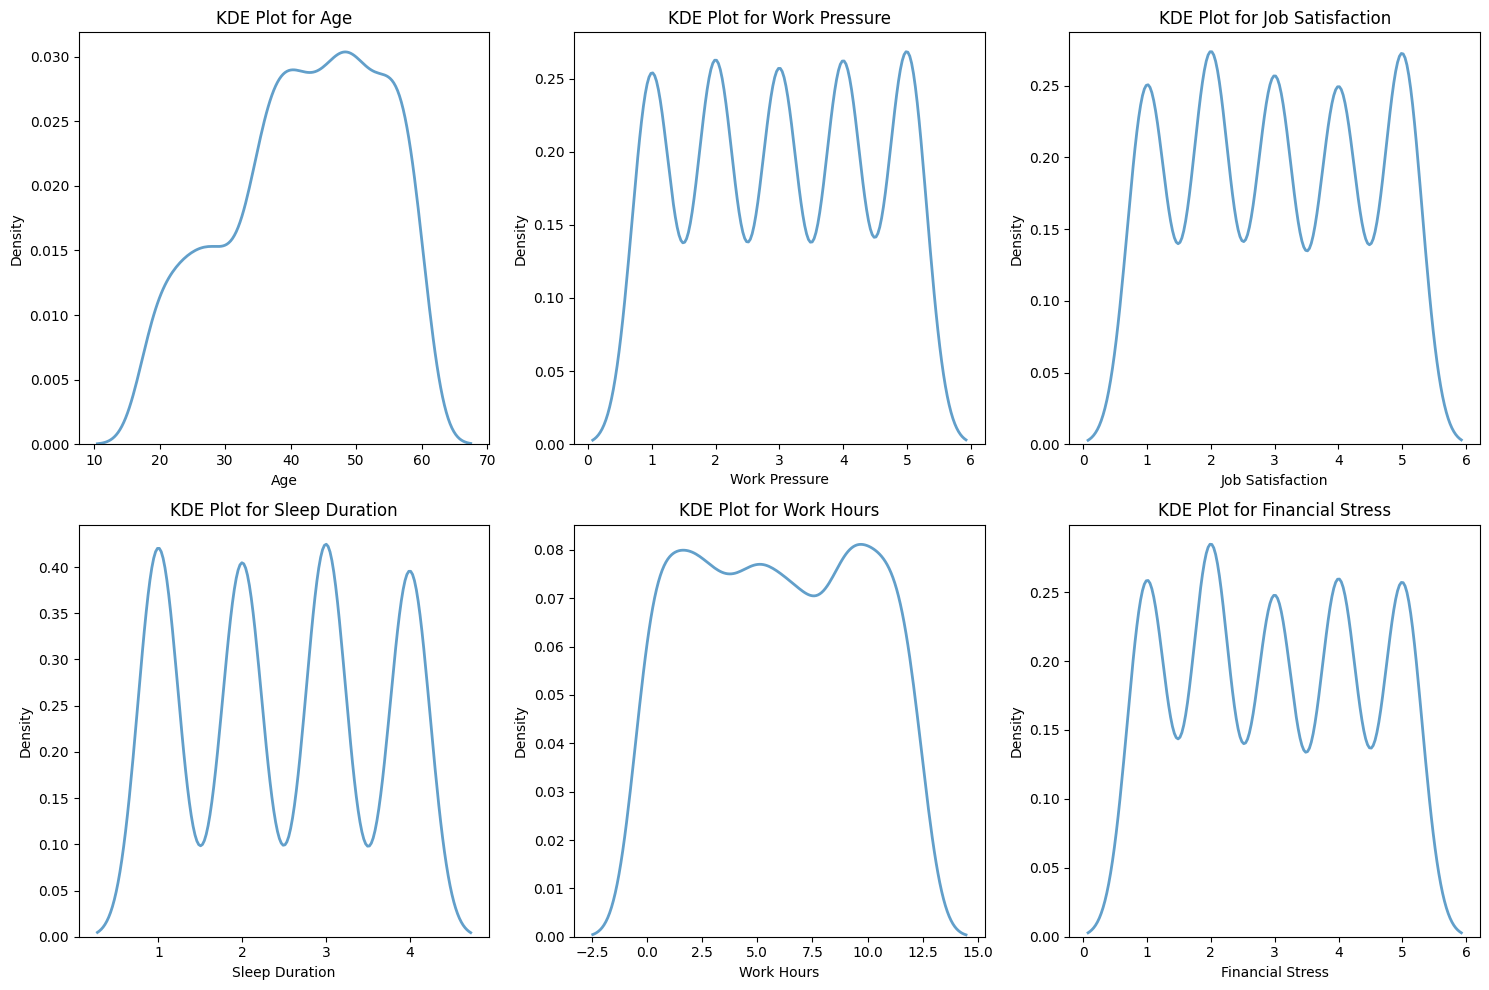

In [23]:
# List of numerical columns
numerical_columns = ['Age', 'Work Pressure', 'Job Satisfaction','Sleep Duration', 'Work Hours', 'Financial Stress']

# Create a figure with subplots for each column
plt.figure(figsize=(15, 10))  # Adjust size based on the number of columns

# Loop through numerical columns and plot KDE
for i, col in enumerate(numerical_columns, 1):  # Start index at 1 for subplot
    plt.subplot(2, 3, i)  # Create subplots (rows, columns, index)
    sns.kdeplot(Depression_status[col], fill=False,palette="coolwarm", alpha=0.7, linewidth=2)
    plt.title(f"KDE Plot for {col}")
    plt.xlabel(col)
    plt.ylabel("Density")

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

## NO outliers in the data

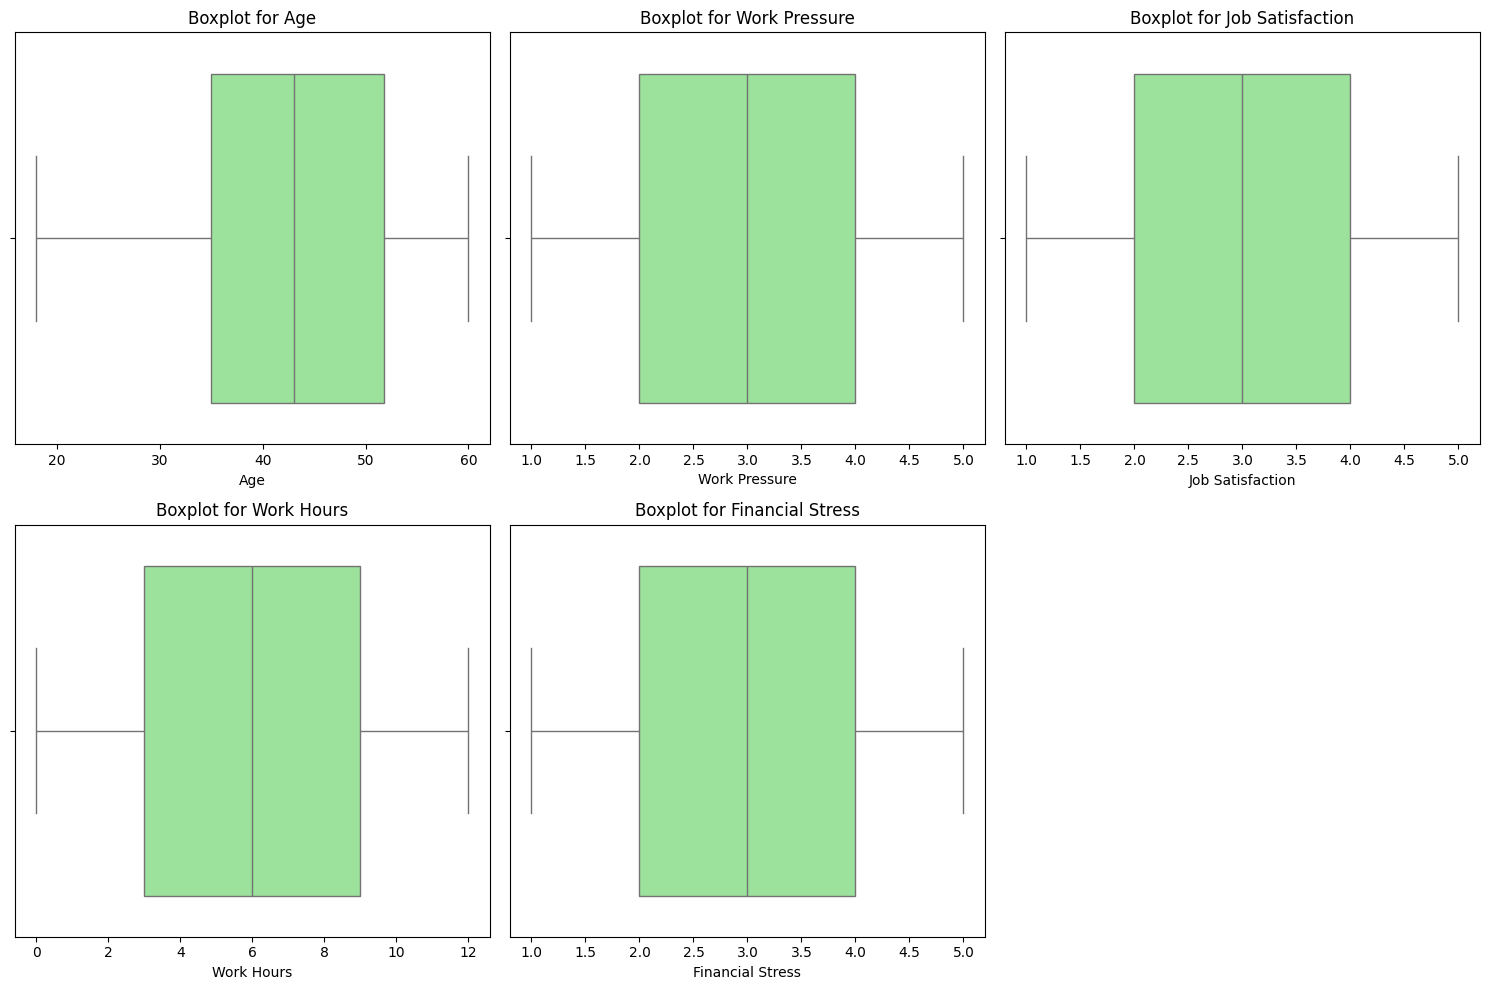

In [24]:
# List of numerical columns
numerical_columns = ['Age', 'Work Pressure', 'Job Satisfaction', 'Work Hours', 'Financial Stress']

# Create a figure with subplots for each column
plt.figure(figsize=(15, 10))  # Adjust size based on the number of columns

# Loop through numerical columns and plot boxplots
for i, col in enumerate(numerical_columns, 1):  # Start index at 1 for subplot
    plt.subplot(2, 3, i)  # Create subplots (rows, columns, index)
    sns.boxplot(data=Depression_status, x=col, color="lightgreen")
    plt.title(f"Boxplot for {col}")
    plt.xlabel(col)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


In [25]:
Depression_status.head()

,Gender,Age,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work Hours,Financial Stress,Family History of Mental Illness,Depression
0,Female,37,2.0,4.0,3,Moderate,No,6,2,No,No
1,Male,60,4.0,3.0,2,Unhealthy,Yes,0,4,Yes,No
2,Female,42,2.0,3.0,2,Moderate,No,0,2,No,No
3,Female,44,3.0,5.0,3,Healthy,Yes,1,2,Yes,No
4,Male,48,4.0,3.0,3,Moderate,Yes,6,5,Yes,No


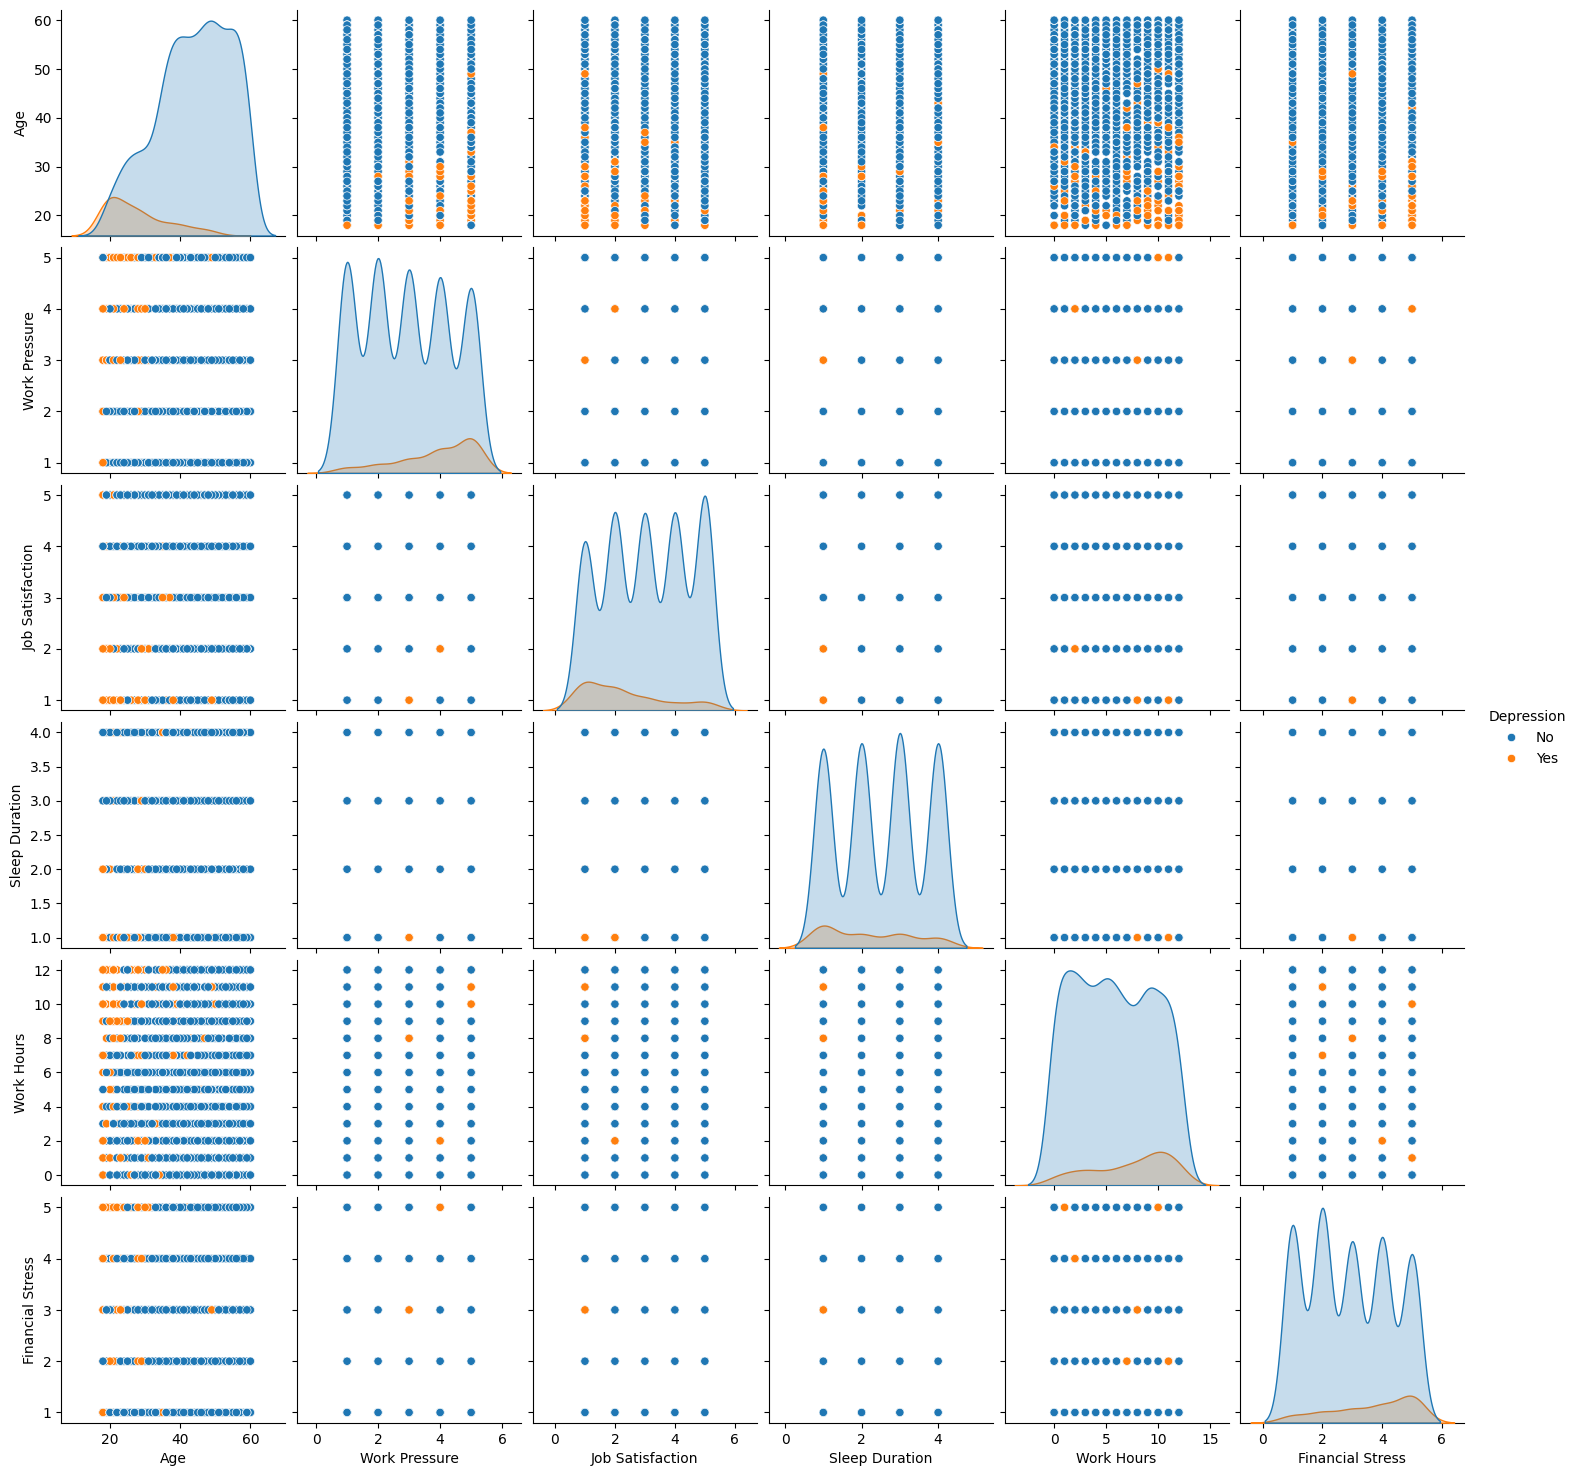

In [26]:
# Create a pairplot for the numerical columns
sns.pairplot(Depression_status,hue = 'Depression')

# Show the plot
plt.show()

In [27]:
correlation_matrix =Depression_status.describe().corr()
correlation_matrix

,Age,Work Pressure,Job Satisfaction,Sleep Duration,Work Hours,Financial Stress
Age,1.000000,0.999781,0.999781,0.999772,0.999830,0.999781
Work Pressure,0.999781,1.000000,1.000000,1.000000,0.999994,1.000000
Job Satisfaction,0.999781,1.000000,1.000000,1.000000,0.999994,1.000000
Sleep Duration,0.999772,1.000000,1.000000,1.000000,0.999993,1.000000
Work Hours,0.999830,0.999994,0.999994,0.999993,1.000000,0.999994
Financial Stress,0.999781,1.000000,1.000000,1.000000,0.999994,1.000000


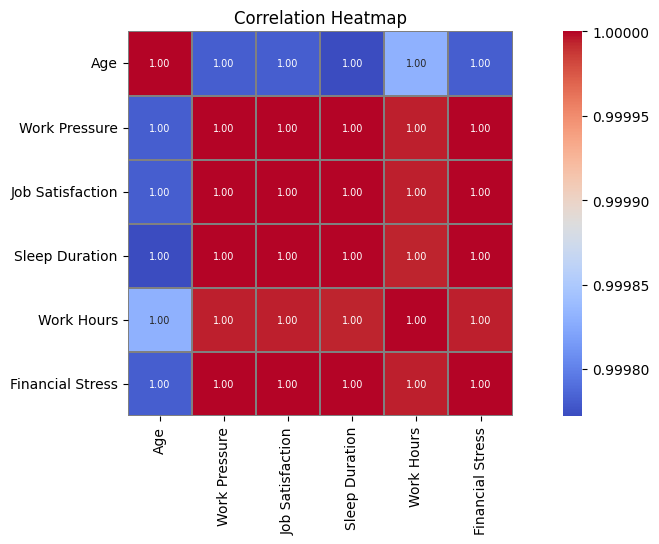

In [28]:
plt.figure(figsize=(13, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True,linewidths=0.3,linecolor='gray',annot_kws={"size": 7},fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

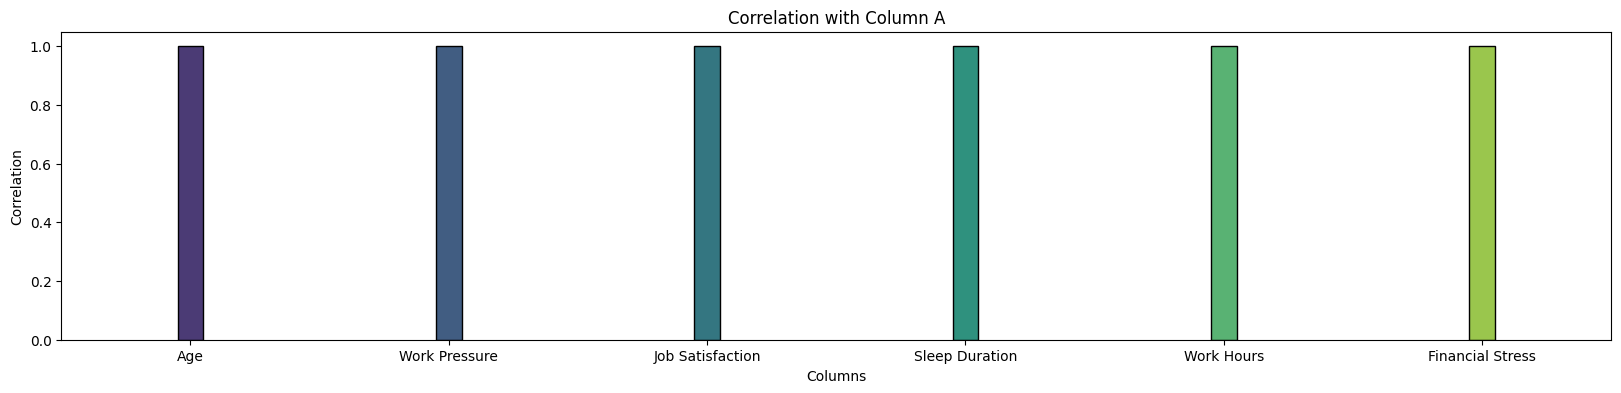

In [29]:
plt.figure(figsize=(20, 4))
# sns.barplot(x=correlation_matrix.columns, y=correlation_matrix.iloc[0], palette='viridis')
sns.barplot(correlation_matrix, palette='viridis',edgecolor='black', linewidth=1,width=0.1)
plt.title('Correlation with Column A')
plt.xlabel('Columns')
plt.ylabel('Correlation')    
plt.show()

## Now buliding the Model 

In [30]:
Depression_status.head()

,Gender,Age,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work Hours,Financial Stress,Family History of Mental Illness,Depression
0,Female,37,2.0,4.0,3,Moderate,No,6,2,No,No
1,Male,60,4.0,3.0,2,Unhealthy,Yes,0,4,Yes,No
2,Female,42,2.0,3.0,2,Moderate,No,0,2,No,No
3,Female,44,3.0,5.0,3,Healthy,Yes,1,2,Yes,No
4,Male,48,4.0,3.0,3,Moderate,Yes,6,5,Yes,No


In [31]:
# Drop column 'B'
X = Depression_status.drop('Depression', axis=1)
y = Depression_status['Depression'] 

In [32]:
X.head()

,Gender,Age,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work Hours,Financial Stress,Family History of Mental Illness
0,Female,37,2.0,4.0,3,Moderate,No,6,2,No
1,Male,60,4.0,3.0,2,Unhealthy,Yes,0,4,Yes
2,Female,42,2.0,3.0,2,Moderate,No,0,2,No
3,Female,44,3.0,5.0,3,Healthy,Yes,1,2,Yes
4,Male,48,4.0,3.0,3,Moderate,Yes,6,5,Yes


In [33]:
y.head()

0    No
1    No
2    No
3    No
4    No
Name: Depression, dtype: object

In [34]:
print(f"shape : {X.shape} , shape : {y.shape} ")

shape : (2054, 10) , shape : (2054,) 


In [35]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
print("X_train shape:",X_train.shape,"X_test shape :",X_test.shape ,"y_train shape :",y_train.shape,"y_test shape : ",y_test.shape)

X_train shape: (1643, 10) X_test shape : (411, 10) y_train shape : (1643,) y_test shape :  (411,)


In [37]:
print(numerical_columns)
print()
print(categorical_columns)

['Age', 'Work Pressure', 'Job Satisfaction', 'Work Hours', 'Financial Stress']

['Gender', 'Dietary Habits', 'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness', 'Depression']


In [38]:
categorical_Ordinal_features = ['Dietary Habits']
categorical_normial_features = ['Gender','Have you ever had suicidal thoughts ?','Family History of Mental Illness']

In [45]:
# Preprocessing for numerical data (Standard scaling) and categorical data (One-Hot Encoding)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('ohe', OneHotEncoder(sparse_output=False,handle_unknown='ignore'),categorical_normial_features), # One-hot encoding for some categorical columns

        ('ord', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1),categorical_normial_features)  # Ordinal encoding for specific categorical columns
    ])

In [46]:
preprocessor

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['Age', 'Work Pressure', 'Job Satisfaction',
                                  'Work Hours', 'Financial Stress']),
                                ('ohe',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse_output=False),
                                 ['Gender',
                                  'Have you ever had suicidal thoughts ?',
                                  'Family History of Mental Illness']),
                                ('ord',
                                 OrdinalEncoder(handle_unknown='use_encoded_value',
                                                unknown_value=-1),
                                 ['Gender',
                                  'Have you ever had suicidal thoughts ?',
                                  'Family History of Mental Illness'])])

Apply all algo 

In [57]:
# 4. Train and Evaluate Multiple Models
classifiers_model = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "HistGradientBoosting": HistGradientBoostingClassifier(),
    "SVC": SVC(),
    "Linear SVC": LinearSVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "GaussianNB": GaussianNB(),
    # "MultinomialNB": MultinomialNB(),
    "BernoulliNB": BernoulliNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "Linear Discriminant Analysis": LinearDiscriminantAnalysis(),
    "Quadratic Discriminant Analysis": QuadraticDiscriminantAnalysis()
}

In [58]:
classifiers_model

{'Logistic Regression': LogisticRegression(),
 'Random Forest': RandomForestClassifier(),
 'Gradient Boosting': GradientBoostingClassifier(),
 'AdaBoost': AdaBoostClassifier(),
 'HistGradientBoosting': HistGradientBoostingClassifier(),
 'SVC': SVC(),
 'Linear SVC': LinearSVC(),
 'K-Nearest Neighbors': KNeighborsClassifier(),
 'GaussianNB': GaussianNB(),
 'BernoulliNB': BernoulliNB(),
 'Decision Tree': DecisionTreeClassifier(),
 'Linear Discriminant Analysis': LinearDiscriminantAnalysis(),
 'Quadratic Discriminant Analysis': QuadraticDiscriminantAnalysis()}

In [ ]:
# Variables to store the best model and its score
best_model = None
best_score = 0
best_model_name = ""
predictions = {}  # Dictionary to store predictions for each model

# Train each classifier and calculate metrics
for name, clf in classifiers_model.items():
    # Create a pipeline with preprocessing and the classifier
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', clf)
    ])
    
    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = pipeline.predict(X_test)
    predictions[name] = y_pred  # Store predictions
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Update best model if current model performs better
    if f1 > best_score:
        best_model = pipeline
        best_score = f1
        best_model_name = name
    
    # Print predictions and metrics for the current classifier
    print(f"\nClassifier: {name}")
    # print(f"Predictions: {y_pred}")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("_______________________________________________________________________________________________________")

# Display the best model
print(f"\nBest Model: {best_model_name}")
print(f"Best F1 Score: {best_score:.2f}")




Classifier: Logistic Regression
Accuracy: 0.97
Precision: 0.97
Recall: 0.97
F1 Score: 0.97
Classification Report:
              precision    recall  f1-score   support

          No       0.97      0.99      0.98       368
         Yes       0.94      0.77      0.85        43

    accuracy                           0.97       411
   macro avg       0.96      0.88      0.92       411
weighted avg       0.97      0.97      0.97       411

Confusion Matrix:
[[366   2]
 [ 10  33]]
_______________________________________________________________________________________________________

Classifier: Random Forest
Accuracy: 0.96
Precision: 0.96
Recall: 0.96
F1 Score: 0.95
Classification Report:
              precision    recall  f1-score   support

          No       0.96      1.00      0.98       368
         Yes       0.96      0.60      0.74        43

    accuracy                           0.96       411
   macro avg       0.96      0.80      0.86       411
weighted avg       0.96      0.9

# Accessing Stored Predictions

In [62]:
# Example: Access predictions for Logistic Regression
AdaBoost_predictions = predictions.get("AdaBoost")
print("Predictions by AdaBoost:", AdaBoost_predictions)


Predictions by AdaBoost: ['No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'Yes' 'No' 'No' 'No' 'No'
 'No' 'Yes' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'Yes' 'No' 'Yes' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'Yes' 'No' 'No'
 'No' 'No' 'No' 'No' 'Yes' 'No' 'No' 'Yes' 'No' 'No' 'No' 'No' 'Yes' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'Yes' 'No' 'Yes' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'Yes' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'Yes' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'Yes' 'No' 'Yes'
 'No' 'No' 'No' 'Yes' 'No' 'No' 'No' 'No' 'Yes' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'Yes' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'Yes' 'No' 'No' 'No' 'No' 'No' 'No

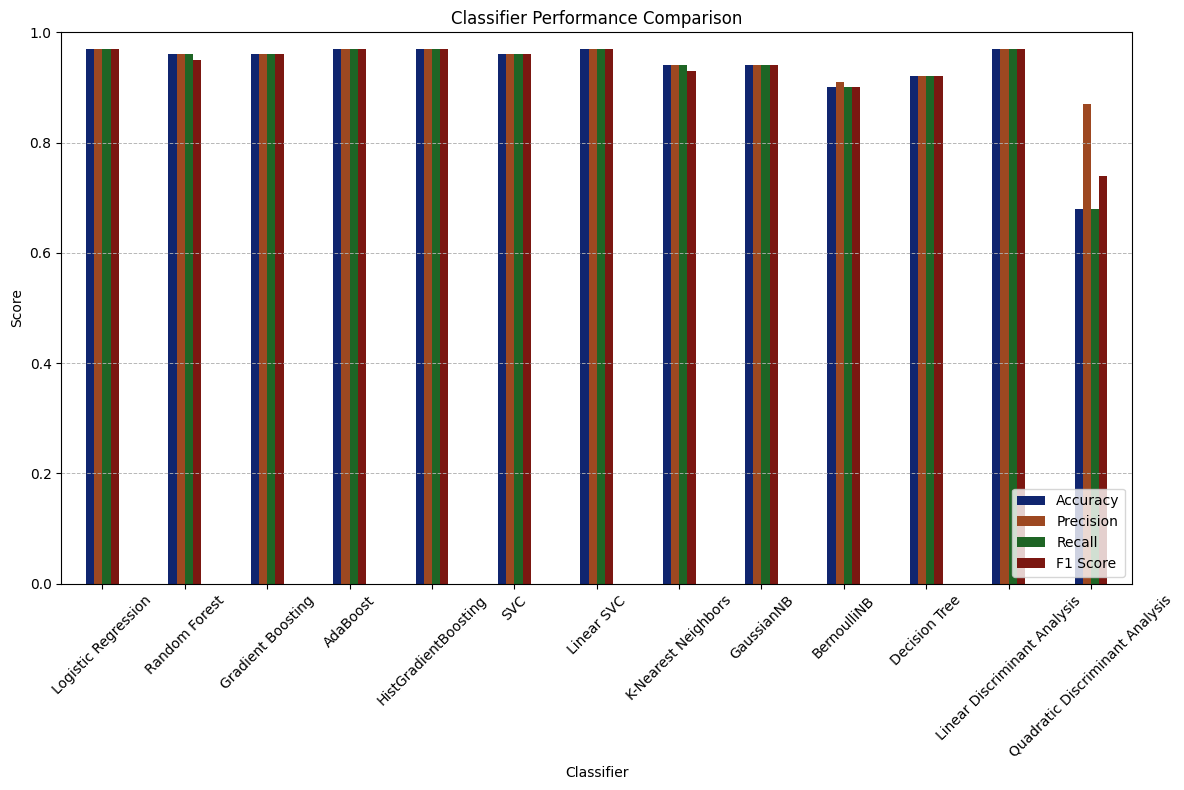

In [65]:
# Data for classifiers
data = {
    "Classifier": [
        "Logistic Regression", "Random Forest", "Gradient Boosting", "AdaBoost",
        "HistGradientBoosting", "SVC", "Linear SVC", "K-Nearest Neighbors",
        "GaussianNB", "BernoulliNB", "Decision Tree",
        "Linear Discriminant Analysis", "Quadratic Discriminant Analysis"
    ],
    "Accuracy": [0.97, 0.96, 0.96, 0.97, 0.97, 0.96, 0.97, 0.94, 0.94, 0.90, 0.92, 0.97, 0.68],
    "Precision": [0.97, 0.96, 0.96, 0.97, 0.97, 0.96, 0.97, 0.94, 0.94, 0.91, 0.92, 0.97, 0.87],
    "Recall": [0.97, 0.96, 0.96, 0.97, 0.97, 0.96, 0.97, 0.94, 0.94, 0.90, 0.92, 0.97, 0.68],
    "F1 Score": [0.97, 0.95, 0.96, 0.97, 0.97, 0.96, 0.97, 0.93, 0.94, 0.90, 0.92, 0.97, 0.74]
}

# Convert data to DataFrame for easier plotting
df = pd.DataFrame(data)

# Set style and plot
plt.figure(figsize=(12, 8))
sns.set_palette("dark")

# Melt the DataFrame to long format for Seaborn plotting
df_melted = df.melt(id_vars='Classifier', var_name='Metric', value_name='Score')

# Plot the barplot
bar_width = 0.4  # Set the desired bar width here
sns.barplot(data=df_melted, x='Classifier', y='Score', hue='Metric', width=bar_width)
plt.title("Classifier Performance Comparison")
plt.ylabel("Score")
plt.xlabel("Classifier")
plt.ylim(0, 1)
plt.legend(loc='lower right')
plt.xticks(rotation=45)
plt.tight_layout()

# Add grid
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.9)

# Show plot
plt.show()


Heatmaps are effective for comparing multiple models and metrics at once. They allow you to quickly spot which classifiers perform best and in which areas (e.g., which classifier has
 the highest accuracy, which one struggles with recall

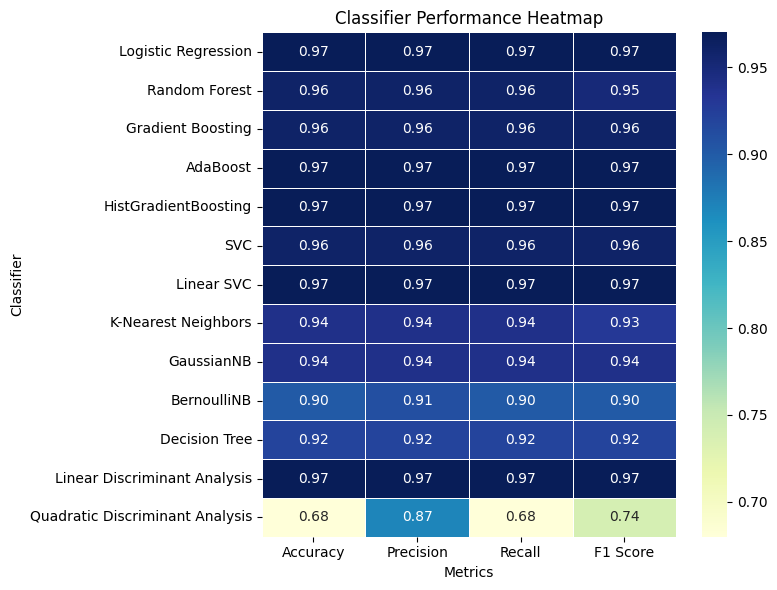

In [66]:
# Convert the data into a DataFrame and set the 'Classifier' column as the index
df = pd.DataFrame(data).set_index('Classifier')

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df, annot=True, cmap="YlGnBu", linewidths=0.5, fmt=".2f")
plt.title("Classifier Performance Heatmap")
plt.xlabel("Metrics")
plt.ylabel("Classifier")
plt.tight_layout()

# Show the plot
plt.show()
